In [14]:
import numpy as np

# number of replicas in Z
NReplicas = 10
# number of steps in the dynamics
Nsteps = int(1e5)
# number of repetition for the self-consistent mean
Nrepeat = 1

dt = 0.001
Z = np.random.normal(0, 1, NReplicas)

x = np.zeros((NReplicas, Nsteps), dtype=np.float64)
y = np.zeros((NReplicas, Nsteps), dtype=np.float64)

x0 = np.random.randn()
y0 = np.random.randn()

x[0] = x0
y[0] = y0

mu = 1
muHat = 1
delta = -1/3
muI = 0.6
alpha = 0.1
beta = 0.8
gamma = 0.7
sigma = 0.1

epsilon = 0.1

for _ in range(Nrepeat):
    print(_)
    xmean = np.mean(x, axis = 0)
    for t in range(1, Nsteps):
        x[:, t] = x[:, t-1] + dt * (mu*x[:, t-1] + delta*x[:, t-1]**3 - muHat*y[:, t-1] + muI + epsilon*xmean[t-1] + sigma*Z)
        y[:, t] = y[:, t-1] + dt * alpha*(x[:, t-1] - beta*y[:, t-1] + gamma)
    x[0] = x0
    y[0] = y0

0


In [15]:
import matplotlib.pyplot as plt
old_mean = np.mean(x, axis = 0)

In [16]:
xmean = np.mean(x, axis = 0)
for t in range(1, Nsteps):
    x[:, t] = x[:, t-1] + dt * (mu*x[:, t-1] + delta*x[:, t-1]**3 - muHat*y[:, t-1] + muI + epsilon*xmean[t-1] + sigma*Z)
    y[:, t] = y[:, t-1] + dt * alpha*(x[:, t-1] - beta*y[:, t-1] + gamma)
x[0] = x0
y[0] = y0

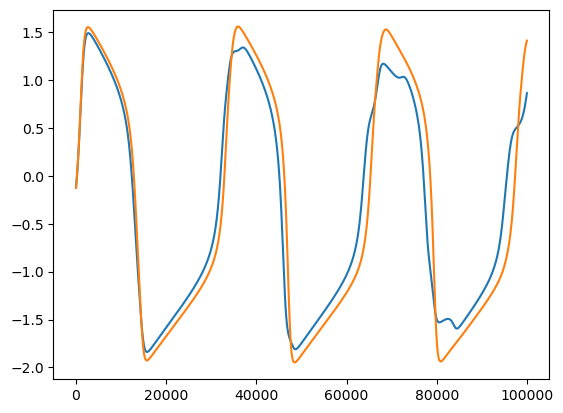

In [17]:
plt.plot(old_mean)
plt.plot(np.mean(x, axis = 0))